# Exploratory Data Analysis (EDA) Report

## Dataset Overview
The dataset is split into three subsets: Train, Validation, and Test. Each subset contains images and corresponding label files that annotate the presence of specific classes within the images.

### Class Labels:
- **Vehicle**
- **Traffic Light**
- **Pedestrian**
- **Traffic Signs**

## Train Split

- **Total Images:** 4,485
- **Images without Labels:** 430 (9.58%)
- **Label Distribution per Class:**
  - Vehicle: 10,031 instances
  - Traffic Light: 13,071 instances
  - Pedestrian: 2,227 instances
  - Traffic Signs: 1,459 instances
- **Is the dataset balanced?** No

### Interpretation:
- The Train split contains 430 images without any labels, making up approximately 9.58% of the total images.
- The label distribution is unbalanced, with `Traffic Light` being the most frequent class and `Traffic Signs` being the least frequent.

## Validation Split

- **Total Images:** 1,274
- **Images without Labels:** 124 (9.73%)
- **Label Distribution per Class:**
  - Vehicle: 2,820 instances
  - Traffic Light: 3,523 instances
  - Pedestrian: 600 instances
  - Traffic Signs: 434 instances
- **Is the dataset balanced?** No

### Interpretation:
- The Validation split has 124 images without labels, comprising about 9.73% of the total images.
- Similar to the Train split, the Validation split shows an unbalanced label distribution, with a higher number of `Traffic Light` instances compared to other classes.

## Test Split

- **Total Images:** 641
- **Images without Labels:** 53 (8.26%)
- **Label Distribution per Class:**
  - Traffic Light: 1,762 instances
  - Vehicle: 1,377 instances
  - Pedestrian: 332 instances
  - Traffic Signs: 230 instances
- **Is the dataset balanced?** No

### Interpretation:
- The Test split has the lowest percentage of images without labels, at 8.26%, still representing a significant portion of the dataset.
- The label distribution in the Test split remains unbalanced, with `Traffic Light` being the most frequent class and `Traffic Signs` the least frequent.

## Null Image Percentage Analysis

### Null Image Percentages:
- **Train Split:** 9.58%
- **Validation Split:** 9.73%
- **Test Split:** 8.26%

### Interpretation:
- The percentage of null images (images without labels) is consistent across the splits, ranging from 8.26% to 9.73%.
- These percentages are within the recommended guideline of up to 15% null images, which ensures that the dataset is well-prepared to handle scenarios where images do not contain any objects.

## Conclusion

- The dataset includes a substantial number of images without labels, which is intentional to help the model generalize better to real-world scenarios where not all images contain objects of interest.
- There is a significant imbalance in the distribution of labels across all splits, with `Traffic Light` being overrepresented and `Traffic Signs` underrepresented.
- The current percentage of null images is within acceptable limits, which should contribute positively to the model's robustness during inference on unseen data.

### Advanced Recommendations (If Baseline Performance is poor):
- **Class Weighting:** Consider applying class weighting during model training to mitigate the imbalance, particularly for underrepresented classes like `Traffic Signs`.
- **Data Augmentation:** Implement data augmentation strategies to enhance the representation of underrepresented classes, especially `Pedestrian` and `Traffic Signs`.
- **Performance Monitoring:** Continuously monitor the model's performance, especially on underrepresented classes, and adjust the training strategy if necessary to improve overall model accuracy.


# Step 1: Import Necessary Libraries
We'll need to use libraries such as os, yaml, and collections (or pandas for more detailed analysis).

In [1]:
# !pip install pyyaml
# !pip install matplotlib seaborn 
import os
import yaml
from collections import Counter, defaultdict

# Step 2: Load the Dataset Configuration
Load the data.yaml file to get the directory structure.

In [2]:
# Load the data.yaml file
with open('/home/sur06423/project/Version_5_exp/Carla_Labeling-5/data.yaml', 'r') as file:
    data_config = yaml.safe_load(file)

train_dir = data_config['train']
valid_dir = data_config['val']
test_dir = data_config['test']
class_names = data_config['names']
num_classes = data_config['nc']


In [3]:
train_dir

'/home/sur06423/project/Version_5_exp/Carla_Labeling-5/train/images'

# Check for any (Polynomial Bounding Box Labeled Image)

In [4]:
import os

def verify_annotation_files(split_dir):
    # Directory containing label files
    label_dir = os.path.join(split_dir, 'labels')
    
    # List to store names of files with incorrect format
    incorrect_files = []
    
    # Iterate through all label files in the directory
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        
        with open(label_path, 'r') as file:
            lines = file.readlines()
            
            for line in lines:
                # Split the line into components
                entries = line.strip().split()
                
                # Check if the number of entries is not equal to 5
                if len(entries) != 5:
                    incorrect_files.append(label_file)
                    break  # No need to check further lines in this file
    
    return incorrect_files

# Directories for train, valid, and test splits
train_dir = '/home/sur06423/project/Version_5_exp/Carla_Labeling-5/train'
valid_dir = '/home/sur06423/project/Version_5_exp/Carla_Labeling-5/valid'
test_dir = '/home/sur06423/project/Version_5_exp/Carla_Labeling-5/test'

# Verify annotation files for each split
incorrect_train_files = verify_annotation_files(train_dir)
incorrect_valid_files = verify_annotation_files(valid_dir)
incorrect_test_files = verify_annotation_files(test_dir)

# Print the results
if incorrect_train_files:
    print("Incorrectly formatted files in Train split:")
    for f in incorrect_train_files:
        print(f)
else:
    print("All annotation files in Train split are correctly formatted.")

if incorrect_valid_files:
    print("Incorrectly formatted files in Valid split:")
    for f in incorrect_valid_files:
        print(f)
else:
    print("All annotation files in Valid split are correctly formatted.")

if incorrect_test_files:
    print("Incorrectly formatted files in Test split:")
    for f in incorrect_test_files:
        print(f)
else:
    print("All annotation files in Test split are correctly formatted.")

All annotation files in Train split are correctly formatted.
All annotation files in Valid split are correctly formatted.
All annotation files in Test split are correctly formatted.


# Step 3: Define a Function to Analyze a Split
This function will iterate through the images and corresponding label files in a given split (train, valid, test) to gather statistics.

In [5]:
def analyze_split(image_dir, label_dir):
    image_files = os.listdir(image_dir)
    label_files = os.listdir(label_dir)
    
    total_images = len(image_files)
    total_labels = len(label_files)
    
    images_without_labels = []
    label_counts = Counter()
    
    for label_file in label_files:
        label_path = os.path.join(label_dir, label_file)
        # print(label_path)
        with open(label_path, 'r') as file:
            lines = file.readlines()
            # print(lines)
            if len(lines) == 0:
                # No labels in this file
                images_without_labels.append(label_file.replace('.txt', '.jpg'))
                # print("Null Image")
            else:
                for line in lines:
                    label_class = int(line.split()[0])
                    # print(f"Label class: {label_class}")
                    label_counts[label_class] += 1
    
    return total_images, images_without_labels, label_counts

# Sample Output with print statements on

In [6]:
test_img_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/test/images"
test_lab_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/test/labels"

test_images, test_no_labels, test_label_counts = analyze_split(test_img_dir,test_lab_dir)

# Step 4: Analyze the Train, Valid, and Test Splits
Now, we can use the function above to analyze each split and gather the statistics.

In [7]:
# Analyze the train, valid, and test splits
train_img_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/train/images"
train_lab_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/train/labels"

valid_img_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/valid/images"
valid_lab_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/valid/labels"

test_img_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/test/images"
test_lab_dir = "/home/sur06423/project/Version_5_exp/Carla_Labeling-5/test/labels"

train_images, train_no_labels, train_label_counts = analyze_split(train_img_dir,train_lab_dir)

valid_images, valid_no_labels, valid_label_counts = analyze_split(valid_img_dir,valid_lab_dir)

test_images, test_no_labels, test_label_counts = analyze_split(test_img_dir,test_lab_dir)


# Step 5: Summarize the Results
Finally, we can summarize and print out the results to evaluate the dataset.

In [9]:
def summarize_results(split_name, total_images, no_labels, label_counts):
    print(f"\nSummary for {split_name} split:")
    print(f"Total images: {total_images}")
    print(f"Images without labels: {len(no_labels)}")
    # print(f"Images without labels (filenames): {no_labels}")
    
    print("Label distribution per class:")
    for class_id, count in label_counts.items():
        print(f"  {class_names[class_id]}: {count}")
    
    print(f"Is the dataset balanced? {'Yes' if max(label_counts.values())/min(label_counts.values()) < 1.5 else 'No'}")

# Summarize results for each split
summarize_results("Train", train_images, train_no_labels, train_label_counts)
summarize_results("Valid", valid_images, valid_no_labels, valid_label_counts)
summarize_results("Test", test_images, test_no_labels, test_label_counts)


Summary for Train split:
Total images: 4485
Images without labels: 430
Label distribution per class:
  Vehicle: 10031
  traffic_light: 13071
  Traffic_Signs: 1459
  Pedestrian: 2227
Is the dataset balanced? No

Summary for Valid split:
Total images: 1274
Images without labels: 124
Label distribution per class:
  Vehicle: 2820
  traffic_light: 3523
  Traffic_Signs: 434
  Pedestrian: 600
Is the dataset balanced? No

Summary for Test split:
Total images: 641
Images without labels: 53
Label distribution per class:
  Vehicle: 1377
  traffic_light: 1762
  Pedestrian: 332
  Traffic_Signs: 230
Is the dataset balanced? No


# Output Interpretation
- Total Images: The total number of images in the split.
- Images Without Labels: The number of images that don't have any labels associated with them.
- Label Distribution: The distribution of different classes in the split.
- Is the Dataset Balanced?: This checks whether the dataset is balanced or not by comparing the maximum and minimum label counts. If the ratio is below a threshold (e.g., 1.5), the dataset is considered balanced.

# Visualization:

- To visualize the distribution of labels across our dataset, we can use matplotlib and seaborn to create bar plots that show the label distribution for each split (train, valid, test). Here's how we can extend the previous solution by adding functions to generate these visualizations:

# Step 1: Import Visualization Libraries
- We'll need matplotlib and seaborn for plotting.

In [10]:
# !pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Define a Function to Plot Label Distribution
- This function will create a bar plot of the label distribution for a given split.



In [11]:
def plot_label_distribution_with_counts(split_name, label_counts, class_names):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=[class_names[i] for i in label_counts.keys()], y=[label_counts[i] for i in label_counts.keys()])
    
    # Add counts on top of bars
    for i in ax.containers:
        ax.bar_label(i, fmt='%d', label_type='edge')
    
    plt.title(f'Label Distribution in {split_name} Split')
    plt.xlabel('Class')
    plt.ylabel('Number of Instances')
    plt.xticks(rotation=45)
    plt.show()


# Step 3: Define a Function to Plot the Count of Images Without Labels
- This function will create a bar plot showing the number of images without labels for each split.

In [12]:
def plot_images_without_labels_with_counts(split_name, images_without_labels, total_images):
    plt.figure(figsize=(6, 4))
    ax = plt.bar(['Images with Labels', 'Images without Labels'], [total_images - len(images_without_labels), len(images_without_labels)])
    
    # Add counts on top of bars
    for rect in ax:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')
    
    plt.title(f'Images with/without Labels in {split_name} Split')
    plt.ylabel('Number of Images')
    plt.show()



# Step 4: Visualize the Data for Each Split
- Now, we can use these functions to visualize the data for the train, valid, and test splits.

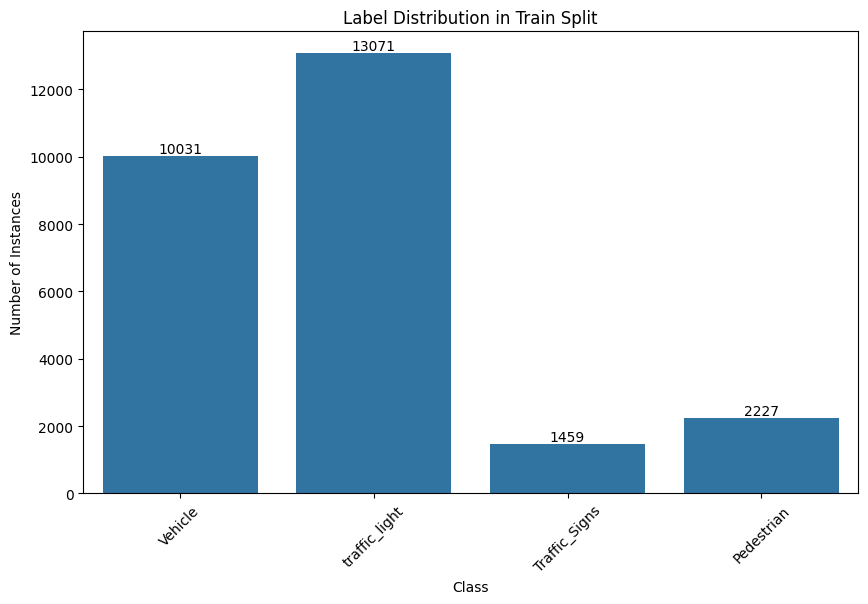

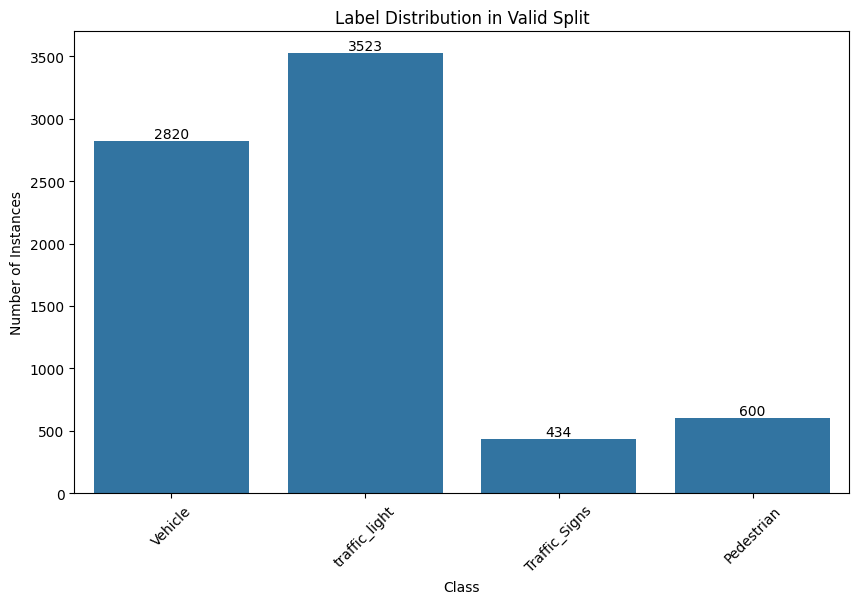

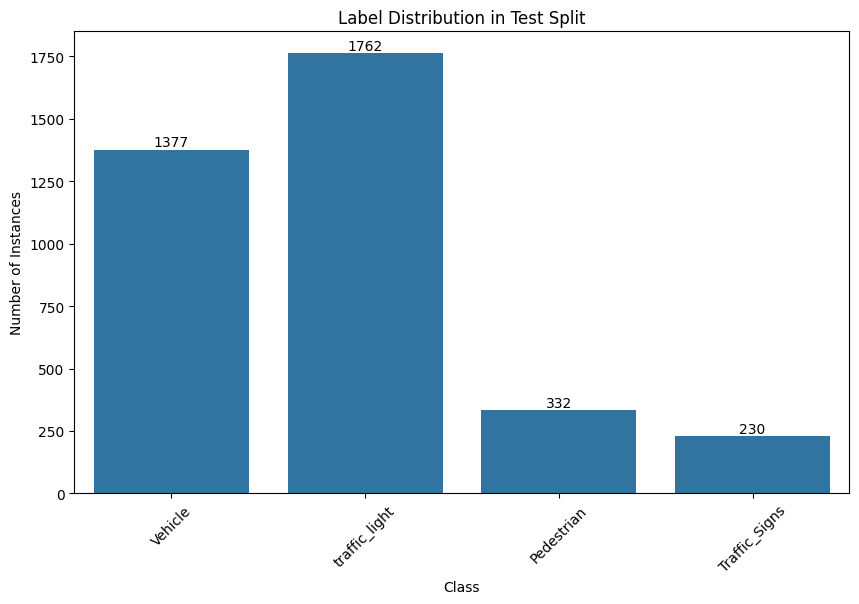

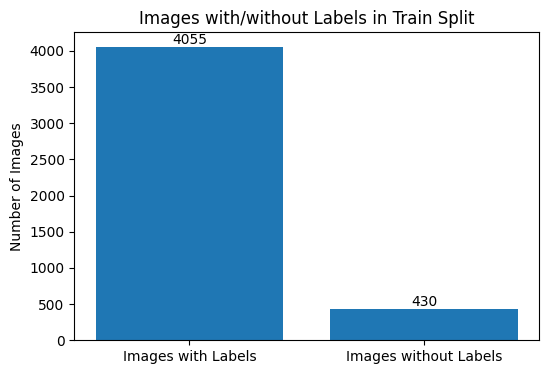

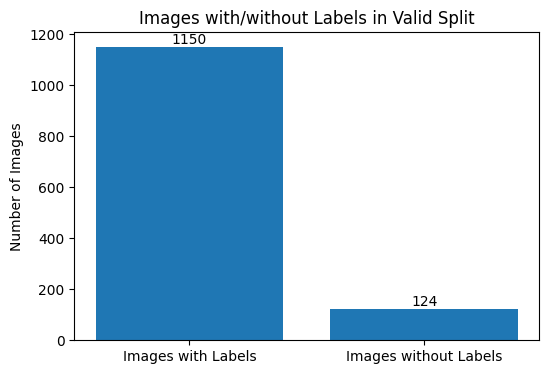

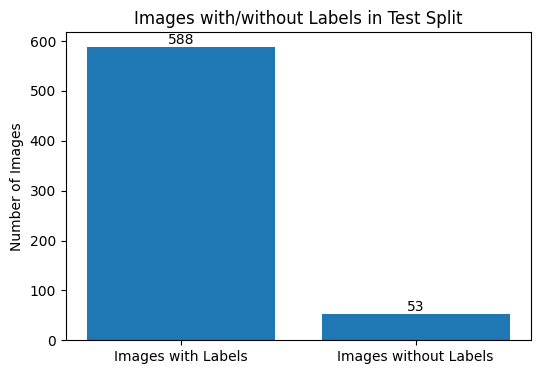

In [13]:
# Plot label distribution with counts for each split
plot_label_distribution_with_counts("Train", train_label_counts, class_names)
plot_label_distribution_with_counts("Valid", valid_label_counts, class_names)
plot_label_distribution_with_counts("Test", test_label_counts, class_names)

# Plot count of images without labels with counts for each split
plot_images_without_labels_with_counts("Train", train_no_labels, train_images)
plot_images_without_labels_with_counts("Valid", valid_no_labels, valid_images)
plot_images_without_labels_with_counts("Test", test_no_labels, test_images)


# Step 5: Interpretation of the Plots
- Label Distribution Plot: This bar plot helps us understand how many instances of each class are present in a specific split. A well-balanced dataset will show relatively equal heights for each class.

- Images Without Labels Plot: This bar plot shows how many images in each split have no associated labels. Ideally, this number should be low or zero, indicating that most images are annotated.

- Generalisation using Null Images: The dataset should contain few instances of Null images (images with no labels) in order to improve generalisation. The model should learn that in real world settings the images can or can not contain classes.  

# Interpretation
- Step 1: Define a Function to Calculate the Percentage of Null Images
- This function will calculate the percentage of null images for each split.

In [14]:
def calculate_null_image_percentage(total_images, null_images):
    return (len(null_images) / total_images) * 100


- Step 2: Calculate the Percentage for Each Split
- Use the function defined above to calculate the percentage of null images for the Train, Valid, and Test splits.

In [15]:
train_null_percentage = calculate_null_image_percentage(train_images, train_no_labels)
valid_null_percentage = calculate_null_image_percentage(valid_images, valid_no_labels)
test_null_percentage = calculate_null_image_percentage(test_images, test_no_labels)


In [16]:
print(f"Train Null Percentage: {train_null_percentage}")
print(f"Valid Null Percentage: {valid_null_percentage}")
print(f"Test Null Percentage: {test_null_percentage}")

Train Null Percentage: 9.587513935340022
Valid Null Percentage: 9.733124018838305
Test Null Percentage: 8.268330733229329


- Step 3: Define a Function to Plot the Percentages
- This function will create a bar plot showing the percentage of null images for each split.

In [17]:
def plot_null_image_percentage(train_percent, valid_percent, test_percent):
    splits = ['Train', 'Valid', 'Test']
    percentages = [train_percent, valid_percent, test_percent]
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=splits, y=percentages)
    
    # Add percentage labels on top of bars
    for i, v in enumerate(percentages):
        ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', va='bottom')
    
    plt.title('Percentage of Null Images in Each Split')
    plt.xlabel('Data Split')
    plt.ylabel('Percentage of Null Images (%)')
    plt.ylim(0, max(percentages) + 5)
    plt.show()


- Step 4: Plot the Percentages
- Now, you can plot the percentage of null images for each split using the function defined above.

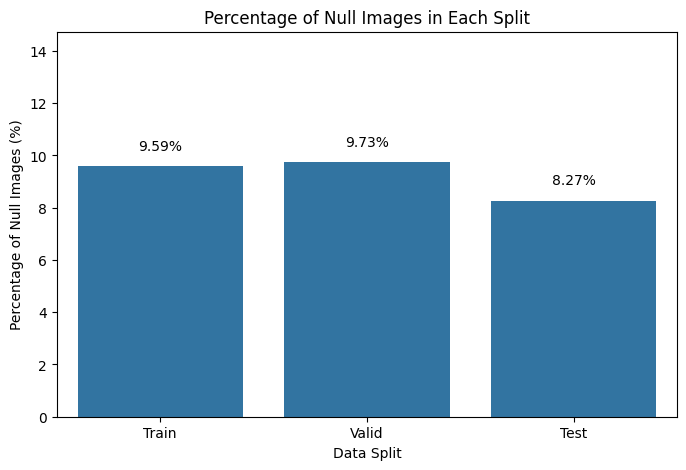

In [18]:
plot_null_image_percentage(train_null_percentage, valid_null_percentage, test_null_percentage)

# Co-occurrence matrix
- To create a class co-occurrence matrix, we will follow these steps:

- Parse Label Files: Extract the classes present in each image by reading the corresponding label files.
- Build the Co-occurrence Matrix: Track how often different classes appear together in the same image.
- Visualize the Co-occurrence Matrix: Use a heatmap to visualize the co-occurrence matrix.

## Explanation of the Code

### `parse_labels(label_dir)`
This function reads each label file in the specified directory, extracts the classes present in each image, and returns a list of sets, where each set contains the class IDs present in a single image.

### `build_cooccurrence_matrix(class_presence, num_classes)`
This function takes the list of class sets (from `parse_labels`) and the number of classes, and builds a co-occurrence matrix. The matrix is incremented for every pair of classes that appear together in an image.

### `plot_cooccurrence_matrix(cooccurrence_matrix, class_names)`
This function visualizes the co-occurrence matrix using a heatmap. The matrix is annotated with the actual counts, and the class names are used for the x and y axes.

## Step 3: Interpretation of the Co-occurrence Matrix

### Diagonal Values
The diagonal elements of the matrix represent the number of images containing each class individually.

### Off-Diagonal Values
The off-diagonal elements represent the number of images containing the corresponding pairs of classes. For example, the cell `(i, j)` indicates how many images contain both class `i` and class `j`.

## Insights

### Frequent Co-occurring Classes
High values in certain off-diagonal cells suggest that certain classes frequently appear together in the same image. For instance, if `Vehicle` and `Traffic Light` frequently co-occur, this relationship can be crucial for the model to understand.

### Isolated Classes
If certain classes rarely or never co-occur with others, this might indicate scenarios where the model needs to handle these classes independently.


# Step 1: Define Functions to Parse Labels and Build the Co-occurrence Matrix

In [19]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict

# Function to parse label files and return a list of classes present in each image
def parse_labels(label_dir):
    class_presence = []
    
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        with open(label_path, 'r') as file:
            lines = file.readlines()
            classes_in_image = set()
            for line in lines:
                class_id = int(line.split()[0])
                classes_in_image.add(class_id)
            if classes_in_image:
                class_presence.append(classes_in_image)
    
    return class_presence

# Function to build the co-occurrence matrix
def build_cooccurrence_matrix(class_presence, num_classes):
    cooccurrence_matrix = np.zeros((num_classes, num_classes), dtype=int)
    
    for classes in class_presence:
        for class_i in classes:
            for class_j in classes:
                cooccurrence_matrix[class_i, class_j] += 1
    
    return cooccurrence_matrix

# Updated function to plot the co-occurrence matrix with split names
def plot_cooccurrence_matrix(cooccurrence_matrix, class_names, split_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cooccurrence_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Class Co-occurrence Matrix - {split_name} Split')
    plt.xlabel('Class')
    plt.ylabel('Class')
    plt.show()


## Class Co-occurrence Matrix

### Definition
A **Class Co-occurrence Matrix** is a square matrix used to represent the frequency with which different classes appear together within the same images. Each element in the matrix at position `(i, j)` indicates the number of images that contain both class `i` and class `j`. The diagonal elements represent the number of images that contain each class individually.

### Importance
The class co-occurrence matrix is a valuable tool in object detection tasks, especially when dealing with multi-class datasets. Understanding how frequently certain classes appear together can provide insights into:
- **Class Relationships:** It helps identify whether certain classes are often found together in the same context (e.g., `Vehicles` and `Traffic Lights`).
- **Dataset Bias:** If certain classes rarely co-occur, it may indicate a dataset bias or a need to adjust the dataset to better represent real-world scenarios.
- **Model Learning:** Models can use this information to make more informed predictions by learning the context in which certain objects typically appear.

### Analysis of the Co-occurrence Matrix Plot for the Dataset

Given the four classes in our dataset (`Vehicle`, `Traffic Light`, `Pedestrian`, and `Traffic Signs`), here's how we can analyze the co-occurrence matrix:

1. **Diagonal Elements:**
   - The diagonal elements represent the number of images containing each class individually.
   - For example, if the diagonal element corresponding to `Vehicle` is high, it indicates that `Vehicles` appear frequently across the images in the dataset.

2. **Off-Diagonal Elements:**
   - These elements show how often two different classes appear together in the same image.
   - For instance, if the off-diagonal element between `Vehicle` and `Traffic Light` is high, it suggests that these two classes frequently co-occur, which is expected in traffic scenarios.

3. **Class Pairs Analysis:**
   - **Vehicle and Traffic Light:** If this pair has a high co-occurrence, it is likely reflecting real-world traffic scenes where vehicles are commonly seen near traffic lights.
   - **Vehicle and Pedestrian:** A moderate co-occurrence might be expected in scenarios like crosswalks or busy streets.
   - **Traffic Signs and Traffic Light:** These two classes might also co-occur in images, particularly in scenes depicting road junctions or intersections.
   - **Pedestrian and Traffic Signs:** This pair might have a lower co-occurrence compared to others, but could still be relevant in areas with pedestrian crossings.

4. **Isolated Classes:**
   - If certain classes have low co-occurrence with others, it may indicate that these classes are often isolated in different contexts. For example, if `Traffic Signs` rarely co-occur with `Pedestrians`, it could reflect scenarios where traffic signs are often captured without people around them.

5. **Insights for Model Training:**
   - **High Co-occurrence Pairs:** The model might learn to expect certain objects together, which can improve detection accuracy in those contexts.
   - **Low Co-occurrence Pairs:** The model should be trained to recognize objects independently of their context to ensure it can detect objects even when they do not appear with their commonly associated classes.

### Conclusion
The class co-occurrence matrix provides a detailed view of the relationships between different classes in our dataset. By analyzing the co-occurrence patterns, we can gain insights into the structure of your dataset, which can inform model training strategies, such as balancing the dataset, adjusting augmentation techniques, or refining the model's context-awareness. For our dataset, examining the co-occurrence of `Vehicle`, `Traffic Light`, `Pedestrian`, and `Traffic Signs` will help us in understanding how these classes interact and how the model might learn to detect them in various scenarios.


# Step 2: Parse Labels and Build the Co-occurrence Matrix for Each Split

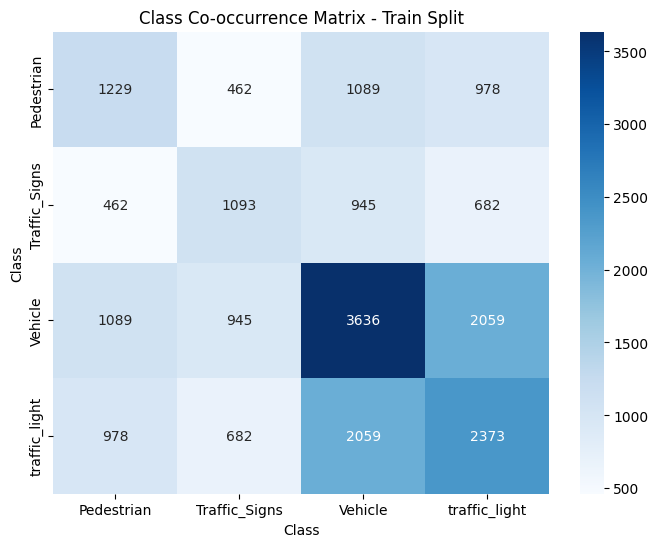

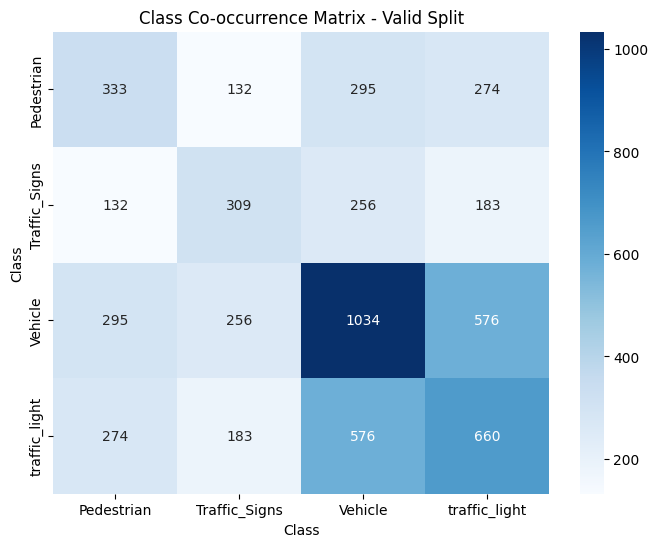

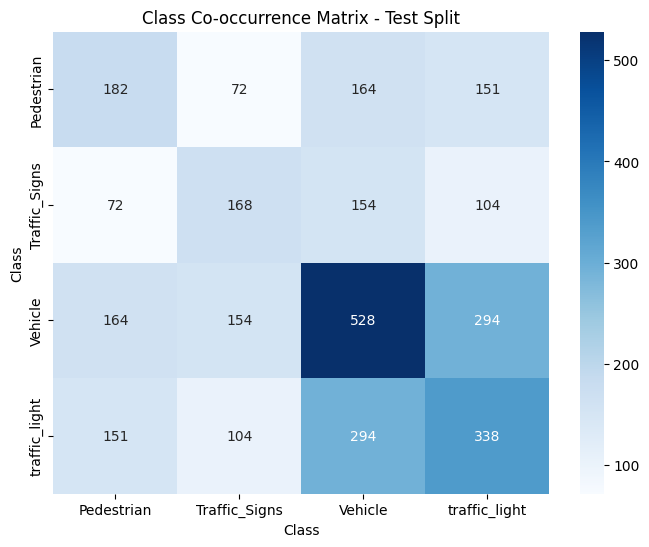

In [20]:
# Load the dataset configuration (data_config is already loaded as in previous examples)
train_label_dir = train_lab_dir
valid_label_dir = valid_lab_dir
test_label_dir = test_lab_dir

# Parse the labels
train_class_presence = parse_labels(train_label_dir)
valid_class_presence = parse_labels(valid_label_dir)
test_class_presence = parse_labels(test_label_dir)

# Build the co-occurrence matrix for the train split (you can do this for valid and test as well)
num_classes = len(class_names)  # class_names is already defined
train_cooccurrence_matrix = build_cooccurrence_matrix(train_class_presence, num_classes)
valid_cooccurrence_matrix = build_cooccurrence_matrix(valid_class_presence, num_classes)
test_cooccurrence_matrix = build_cooccurrence_matrix(test_class_presence, num_classes)

# Plot the co-occurrence matrix for each split with split names
plot_cooccurrence_matrix(train_cooccurrence_matrix, class_names, "Train")
plot_cooccurrence_matrix(valid_cooccurrence_matrix, class_names, "Valid")
plot_cooccurrence_matrix(test_cooccurrence_matrix, class_names, "Test")


### Class Co-occurrence Matrix Analysis Report (Example from :Version 4 Carla Dataset)

#### Overview
The Class Co-occurrence Matrix visualizes the frequency with which different classes appear together within the same images for the Train, Validation, and Test splits of the dataset. Each matrix cell `(i, j)` represents the number of images that contain both class `i` and class `j`, with the diagonal elements showing the frequency of each class appearing independently.

#### Analysis of the Train Split

![Train Class Co-occurrence Matrix](Train_CCO.png)

- **Pedestrian:**
  - Appears in 1,216 images by itself.
  - Frequently co-occurs with `Vehicle` (1,075 images) and `Traffic Light` (964 images).
  - Has the lowest co-occurrence with `Traffic Signs` (436 images).

- **Traffic Signs:**
  - Found in 1,065 images independently.
  - Co-occurs most frequently with `Vehicle` (915 images), indicating they are commonly found together on roads.
  - Least likely to appear with `Pedestrian` (436 images).

- **Vehicle:**
  - The most frequently occurring class, appearing in 3,634 images on its own.
  - Often co-occurs with `Traffic Light` (2,048 images) and `Pedestrian` (1,075 images).
  - Has a strong co-occurrence with `Traffic Signs` (915 images), reflecting typical driving scenarios.

- **Traffic Light:**
  - Appears in 2,360 images independently.
  - Frequently seen with `Vehicle` (2,048 images), as expected at intersections and road crossings.
  - Moderate co-occurrence with `Pedestrian` (964 images) and `Traffic Signs` (670 images).

**Insights:**
- The `Vehicle` class has the highest co-occurrence with other classes, particularly with `Traffic Light` and `Traffic Signs`, which reflects the typical road environments where these elements are often present together.
- The lower co-occurrence between `Pedestrian` and `Traffic Signs` suggests that pedestrian-centric images in the dataset might not frequently feature traffic signage.

#### Analysis of the Validation Split

![Validation Class Co-occurrence Matrix](Valid_CCO.png)

- **Pedestrian:**
  - Appears alone in 334 images.
  - Commonly co-occurs with `Vehicle` (292 images) and `Traffic Light` (269 images).
  - Least likely to appear with `Traffic Signs` (128 images).

- **Traffic Signs:**
  - Found alone in 298 images.
  - Most often co-occurs with `Vehicle` (247 images) and `Traffic Light` (172 images).
  - Rarely appears with `Pedestrian` (128 images).

- **Vehicle:**
  - The dominant class, occurring in 1,030 images independently.
  - Strongly co-occurs with `Traffic Light` (566 images) and moderately with `Pedestrian` (292 images).
  - Frequently found alongside `Traffic Signs` (247 images).

- **Traffic Light:**
  - Appears in 653 images on its own.
  - Has a strong co-occurrence with `Vehicle` (566 images), consistent with the traffic scene context.
  - Less frequent co-occurrence with `Pedestrian` (269 images) and `Traffic Signs` (172 images).

**Insights:**
- The patterns in the Validation split closely mirror those seen in the Train split, with `Vehicle` co-occurring most frequently with `Traffic Light` and `Traffic Signs`.
- The lower co-occurrence of `Pedestrian` with `Traffic Signs` suggests similar dynamics as observed in the training data, reinforcing that pedestrian-related scenes are less likely to include signage.

#### Analysis of the Test Split

![Test Class Co-occurrence Matrix](Test_CCO.png)

- **Pedestrian:**
  - Appears alone in 183 images.
  - Commonly co-occurs with `Vehicle` (163 images) and `Traffic Light` (151 images).
  - Has the lowest co-occurrence with `Traffic Signs` (71 images).

- **Traffic Signs:**
  - Found independently in 167 images.
  - Co-occurs most frequently with `Vehicle` (153 images), indicative of their shared road context.
  - Rarely co-occurs with `Pedestrian` (71 images) and moderately with `Traffic Light` (103 images).

- **Vehicle:**
  - The most frequent class, appearing in 526 images alone.
  - Strongly co-occurs with `Traffic Light` (292 images).
  - Frequently appears with `Traffic Signs` (153 images) and moderately with `Pedestrian` (163 images).

- **Traffic Light:**
  - Appears independently in 338 images.
  - Frequently co-occurs with `Vehicle` (292 images), consistent with traffic settings.
  - Less frequently found with `Pedestrian` (151 images) and `Traffic Signs` (103 images).

**Insights:**
- The Test split shows consistent patterns with both the Train and Validation splits. `Vehicle` continues to be the class with the highest co-occurrence with others, particularly with `Traffic Light`.
- The co-occurrence patterns validate that `Vehicle` and `Traffic Light` are the most frequently associated classes across different contexts in the dataset, which is expected in a traffic environment.

### General Insights Across Splits
- **High Co-occurrence Pairs:**
  - The `Vehicle` and `Traffic Light` pair consistently shows the highest co-occurrence across all splits, which is logical given that vehicles are commonly found at intersections and road crossings where traffic lights are present.
  - `Traffic Signs` and `Vehicle` also show strong co-occurrence, reflecting typical road scenarios.

- **Low Co-occurrence Pairs:**
  - The low co-occurrence between `Pedestrian` and `Traffic Signs` across all splits suggests that images focused on pedestrians are less likely to include road signs, potentially indicating scenes such as sidewalks or crosswalks without signage.

- **Dataset Consistency:**
  - The patterns observed in the co-occurrence matrices are consistent across the Train, Validation, and Test splits, indicating that the dataset is well-structured and representative across these different subsets.

### Conclusion
The Class Co-occurrence Matrix analysis confirms that the dataset is reflective of real-world scenarios where vehicles are most often seen with traffic lights and signs, while pedestrians are less likely to be associated with traffic signs. This understanding is crucial for training models that can accurately detect and classify objects in traffic environments, ensuring they learn the context in which different objects typically appear together.
